# 性別分類


# Mount Your Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive/Colab Notebooks

In [3]:
# pwd

In [4]:
#ls -l

# Prepare images dataset (PyTorch)

We will use pandas to read the CSV and PyTorch's Dataset and DataLoader for image loading.

# Load data information

In [5]:
import pandas as pd

In [6]:
# Load attribute CSV
df_data = pd.read_csv('./alldata_for_gender_age.csv')

In [7]:
df_data

,filename,gender,age
0,00000A02.jpg,0,2.0
1,00002A02.jpg,0,2.0
2,00004A02.jpg,0,2.0
3,00006A02.jpg,0,2.0
4,00008A02.jpg,0,2.0
...,...,...,...
13317,13312A80.jpg,1,80.0
13318,13314A80.jpg,1,80.0
13319,13316A80.jpg,1,80.0
13320,13318A80.jpg,1,80.0


# Sampling for demonstration 抽樣展示

As many samples as possible

In [8]:
# 抽樣數張
#df_data = df_data.sample(2000).reset_index()

# 使用全部的圖片
df_data = df_data

In [9]:
df_data.head(3)

,filename,gender,age
0,00000A02.jpg,0,2.0
1,00002A02.jpg,0,2.0
2,00004A02.jpg,0,2.0


In [10]:
df_data.shape

(13322, 3)

# Copy and Unzip image dataset讀訓練圖片檔案

自己準備的影像圖片:解壓縮之後的目錄

It will take several minutes

In [11]:
# 若已經下載到自己的雲端，則不要再下載。
# Download the images from the google drive using one of the following methods
# 下載方式1: wget
#!wget "https://drive.google.com/uc?id=1-h4s-aTnR5pGk7_j0nfgLS4mLpuoUi2m" -O original_images.zip
#!wget "https://drive.google.com/uc?export=view&id=1-h4s-aTnR5pGk7_j0nfgLS4mLpuoUi2m" -O original_images.zip

# 方式2
# !gdown 1-h4s-aTnR5pGk7_j0nfgLS4mLpuoUi2m

In [12]:
%%time
# 若已經下載解壓縮到自己的雲端，則只要執行第一次即可。
# Unzip the images using one of the following methods.It may take a few minutes to unzip the images.
# (1) Meathod 1: For zip file
# from zipfile import ZipFile
# zf = ZipFile('original_images.zip', 'r')
# zf.extractall('./') # 解壓縮到目前目錄底下 只要執行第一次即可。
# zf.extractall('C:/Users/clhuang/Documents/datasets')
# zf.close()

# (2) Method 2: For tgz or tar file
# import tarfile
# with tarfile.open("flower_photos.tgz") as tf:
#   tf.extractall()

CPU times: total: 0 ns
Wall time: 0 ns


## Data Augmentation and Preprocessing

Use torchvision transforms for augmentation and normalization.

In [13]:
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import os
import torch.nn as nn


In [14]:
# Data augmentation and normalization for training and validation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2), ratio=(0.9, 1.1)),
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

## Take a look at a photo

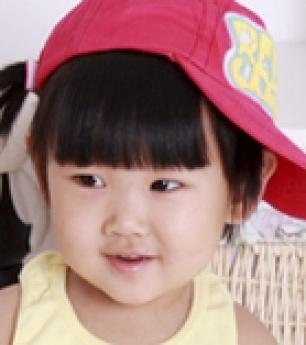

In [ ]:
img_name = "00000A02.jpg"
img_dir = './original_images'
#img_dir = 'C:/Users/clhuang/Documents/datasets/original_images'
img_path = os.path.join(img_dir, img_name)
image = Image.open(img_path).convert('RGB')
image

In [ ]:
image.size # (width, height)

(306, 345)

In [ ]:
import numpy as np
# Convert image to numpy array
image_array = np.array(image)
print( image_array.shape ) # (height, width, channels)
image_array

(345, 306, 3)


array([[[227, 221, 233],
        [228, 222, 234],
        [228, 222, 234],
        ...,
        [222, 216, 226],
        [221, 215, 225],
        [221, 216, 223]],

       [[227, 221, 233],
        [228, 222, 234],
        [228, 222, 234],
        ...,
        [222, 216, 226],
        [220, 214, 224],
        [220, 215, 222]],

       [[227, 221, 233],
        [228, 222, 234],
        [228, 222, 234],
        ...,
        [222, 216, 226],
        [219, 213, 223],
        [219, 214, 221]],

       ...,

       [[209, 170, 155],
        [208, 171, 155],
        [207, 171, 155],
        ...,
        [228, 209, 202],
        [184, 162, 148],
        [184, 163, 144]],

       [[209, 170, 155],
        [208, 171, 155],
        [207, 171, 155],
        ...,
        [228, 209, 202],
        [180, 158, 144],
        [180, 159, 140]],

       [[208, 171, 155],
        [210, 173, 157],
        [209, 173, 157],
        ...,
        [226, 207, 200],
        [180, 158, 144],
        [180, 159, 140]]

In [ ]:
image_array/255.0

array([[[0.89019608, 0.86666667, 0.91372549],
        [0.89411765, 0.87058824, 0.91764706],
        [0.89411765, 0.87058824, 0.91764706],
        ...,
        [0.87058824, 0.84705882, 0.88627451],
        [0.86666667, 0.84313725, 0.88235294],
        [0.86666667, 0.84705882, 0.8745098 ]],

       [[0.89019608, 0.86666667, 0.91372549],
        [0.89411765, 0.87058824, 0.91764706],
        [0.89411765, 0.87058824, 0.91764706],
        ...,
        [0.87058824, 0.84705882, 0.88627451],
        [0.8627451 , 0.83921569, 0.87843137],
        [0.8627451 , 0.84313725, 0.87058824]],

       [[0.89019608, 0.86666667, 0.91372549],
        [0.89411765, 0.87058824, 0.91764706],
        [0.89411765, 0.87058824, 0.91764706],
        ...,
        [0.87058824, 0.84705882, 0.88627451],
        [0.85882353, 0.83529412, 0.8745098 ],
        [0.85882353, 0.83921569, 0.86666667]],

       ...,

       [[0.81960784, 0.66666667, 0.60784314],
        [0.81568627, 0.67058824, 0.60784314],
        [0.81176471, 0

In [ ]:
print(train_transform(image).shape)
train_transform(image)

torch.Size([3, 224, 224])


tensor([[[1.3242, 1.3070, 1.1529,  ..., 1.7865, 1.8208, 1.8037],
         [1.3584, 1.3242, 1.1872,  ..., 1.7865, 1.8208, 1.7865],
         [1.3927, 1.3584, 1.2214,  ..., 1.8037, 1.7865, 1.7352],
         ...,
         [1.7694, 1.7694, 1.7865,  ..., 1.7865, 1.7694, 1.7352],
         [1.7694, 1.7694, 1.7865,  ..., 1.7865, 1.7694, 1.7352],
         [1.7865, 1.7694, 1.7865,  ..., 1.7865, 1.7694, 1.7352]],

        [[0.9405, 0.8529, 0.6254,  ..., 1.6408, 1.6758, 1.6583],
         [0.9405, 0.8704, 0.6604,  ..., 1.6758, 1.6933, 1.6583],
         [0.9230, 0.8880, 0.7129,  ..., 1.7108, 1.7108, 1.6232],
         ...,
         [1.8333, 1.8333, 1.8508,  ..., 1.8508, 1.8333, 1.7983],
         [1.8333, 1.8333, 1.8508,  ..., 1.8508, 1.8333, 1.7983],
         [1.8508, 1.8333, 1.8508,  ..., 1.8508, 1.8333, 1.7983]],

        [[0.8099, 0.7228, 0.4962,  ..., 1.5942, 1.6814, 1.6988],
         [0.8274, 0.7402, 0.5485,  ..., 1.6291, 1.6988, 1.6988],
         [0.8448, 0.7751, 0.6008,  ..., 1.6988, 1.7337, 1.

## Define PyTorch Dataset

Custom dataset for loading images and labels.


In [15]:

class GenderDataset(Dataset):
    def __init__(self, dataframe, img_dir, preprocess=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.preprocess = preprocess

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['filename']
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        image = self.preprocess(image)
        label = int(self.dataframe.iloc[idx]['gender'])
        return image, label

## Split dataset into train and validation

Use 80% for training and 20% for validation.

In [16]:
from sklearn.model_selection import train_test_split


train_df, valid_df = train_test_split(df_data, test_size=0.1, stratify=df_data['gender'], random_state=42)
# img_dir = './original_images'
img_dir = 'C:/Users/clhuang/Documents/datasets/original_images'

train_dataset = GenderDataset(train_df, img_dir, preprocess=train_transform)
valid_dataset = GenderDataset(valid_df, img_dir, preprocess=valid_transform)

batch_size = 48
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize a batch of images

Show a few images and labels from the training set.

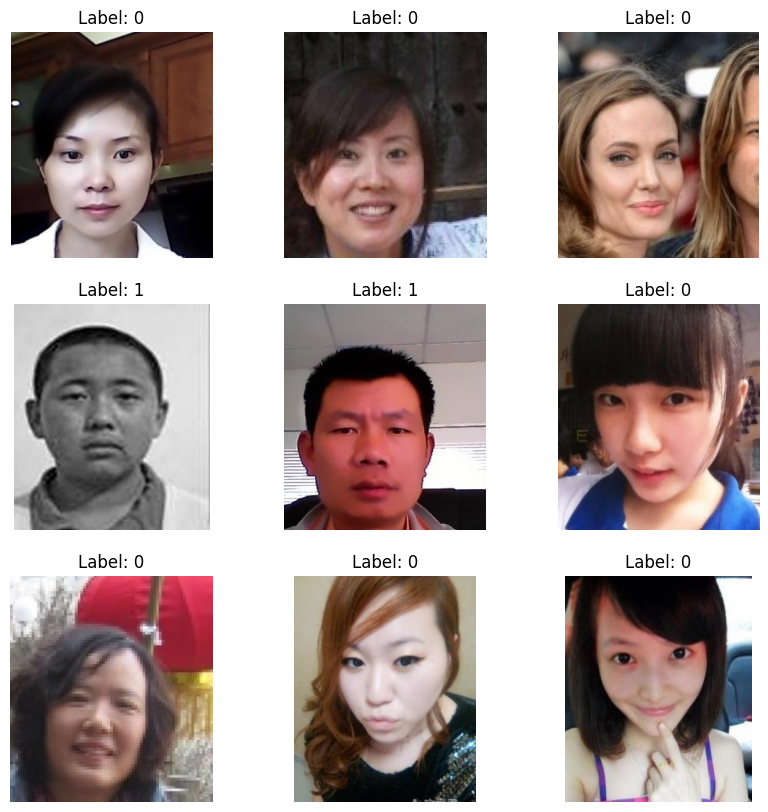

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img_name = train_df.iloc[i]['filename']
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.title(f"Label: {train_df.iloc[i]['gender']}")
    plt.axis('off')

# Build the Model

## SimpleCNN 模型結構圖示

```
Input (3x224x224)
   │
Conv2d(3→32, 3x3) → BatchNorm → ReLU → MaxPool(2x2)
   │
Conv2d(32→64, 3x3) → BatchNorm → ReLU → MaxPool(2x2)
   │
Conv2d(64→128, 3x3) → BatchNorm → ReLU → MaxPool(2x2)
   │
Conv2d(128→256, 3x3) → BatchNorm → ReLU → MaxPool(2x2)
   │
Flatten
   │
Dropout → Linear(256*14*14→256) → ReLU → Dropout → Linear(256→2)
   │
Output (2 classes)
```

每個卷積層後接 BatchNorm、ReLU、MaxPool，最後展平成全連接層做分類。

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),  # 卷積層，3通道→32通道
            nn.BatchNorm2d(32),                                    # 批次正規化
            nn.ReLU(),                                             # 激活
            nn.MaxPool2d(2, 2),                                    # 最大池化

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),                              # Dropout
            nn.Linear(256 * 14 * 14, 256),                         # 全連接層，展平後→256維
            nn.ReLU(),                                             # 激活
            nn.Dropout(dropout_rate),                              # Dropout
            nn.Linear(256, 2)                                      # 全連接層，256→2類
        )

    def forward(self, x):
        x = self.features(x)
        # x.view(x.size(0), -1) 的用法與意義：
        # x.size(0)：取得 batch_size，保持每個 batch 的樣本數不變
        # -1：自動計算剩餘維度，將所有 channel 與空間維度展平成一維
        # 例如 x shape (batch_size, 256, 14, 14) 變成 (batch_size, 256*14*14)
        x = x.view(x.size(0), -1)  # 展平多維特徵圖為二維。或是用 x = x.flatten(1)  從第1維開始展平，效果相同
        x = self.classifier(x)
        return x

    '''
    x = x.view(x.size(0), -1) 為什麼要這樣做？
    這是為了將多維的特徵圖展平成二維，以便輸入到全連接層：
    卷積層輸出：4維 tensor (batch_size, channels, height, width)
    全連接層需要：2維 tensor (batch_size, features)
    所以 view() 的作用是：
    保持 batch_size 維度
    將後面的所有維度（channels × height × width）壓縮成一個維度
    '''

In [19]:
model = SimpleCNN().to(device)

# Batch normalize
`nn.BatchNorm2d(32)` 是 PyTorch 中的批次正規化（Batch Normalization）層，專門用於 2D 輸入（如圖像的特徵圖）。讓我詳細解釋它的作用和原理：

## 基本概念
批次正規化是一種正規化技術，用來穩定和加速神經網路的訓練。它對每個小批次（batch）的數據進行正規化處理。

## 參數解釋
- `32`：表示輸入的特徵圖通道數（channel 數）
- 適用於 4D 張量：`(batch_size, channels, height, width)`

## 工作原理
對於每個通道，BatchNorm2d 會：
1. **計算均值和方差**：對當前批次中該通道的所有像素計算均值 μ 和標準差 σ
2. **正規化**：將每個像素減去均值，除以標準差
   ```
   x̂ = (x - μ) / √(σ² + ε)
   ```
3. **縮放和平移**：應用可學習的參數 γ 和 β
   ```
   y = γ * x̂ + β
   ```

## 在 CNN 中的作用
- **加速收斂**：減少內部協變數偏移（Internal Covariate Shift）
- **穩定訓練**：讓梯度更穩定，減少梯度消失/爆炸問題
- **允許更大學習率**：因為數據分佈更穩定
- **正則化效果**：有輕微的正則化作用，減少過擬合

## 參數數量
每個 BatchNorm2d 層有 2 個可學習參數：
- **γ (scale)**：32 個參數，用來縮放正規化後的值
- **β (shift)**：32 個參數，用來平移正規化後的值

## 使用時機
- 通常放在卷積層和激活函數之間
- 訓練時使用批次統計，推理時使用移動平均統計
- 在您的 CNN 模型中，每個卷積層後都接了 BatchNorm2d，這是現代 CNN 的標準實踐

總之，BatchNorm2d 是現代深度學習中不可或缺的組件，能顯著改善訓練穩定性和最終性能！

`nn.BatchNorm2d` 在推理（inference/evaluation）時確實使用移動平均統計，這是為了確保模型在不同batch大小或單個樣本上的穩定性。讓我詳細說明這個機制：

## 訓練 vs 推理的差異

### 訓練階段（`model.train()`）
- 使用**當前batch**的統計數據
- 同時更新**移動平均統計**（running statistics）

### 推理階段（`model.eval()`）
- 使用**累積的移動平均統計**（running mean/variance）
- **不更新**這些統計數據

## 移動平均統計的更新機制

在訓練時，BatchNorm層會維護兩個緩衝區：
- `running_mean`：累積的均值
- `running_var`：累積的方差

更新公式（默認momentum=0.1）：
```
running_mean = momentum × running_mean + (1 - momentum) × batch_mean
running_var = momentum × running_var + (1 - momentum) × batch_var
```

## 具體運作流程

### 訓練時的計算：
1. 計算當前batch的均值和方差
2. 使用batch統計進行正規化：`x̂ = (x - batch_mean) / √(batch_var + ε)`
3. 應用可學習參數：`y = γ × x̂ + β`
4. **同時更新running statistics**

### 推理時的計算：
1. **直接使用running statistics**
2. 正規化：`x̂ = (x - running_mean) / √(running_var + ε)`
3. 應用可學習參數：`y = γ × x̂ + β`

## 為什麼需要這樣設計？

1. **穩定性**：避免單個樣本或小batch的統計波動
2. **一致性**：確保無論batch大小如何，推理結果都穩定
3. **性能**：不需要在推理時計算batch統計

## PyTorch中的實現

```python
# 訓練模式
model.train()  # 使用batch統計 + 更新running統計

# 推理模式  
model.eval()  # 使用running統計（不更新）
with torch.no_grad():
    output = model(input)
```

## 實際效果

- **訓練初期**：running統計還不準確，主要依賴batch統計
- **訓練後期**：running統計趨於穩定，接近整個訓練集的統計
- **推理時**：使用這個穩定的統計，確保模型行為一致

這就是為什麼BatchNorm在現代CNN中如此重要的原因——它讓模型在訓練和推理時都能保持穩定表現！

# Training and Validation Loop

Standard PyTorch training loop with validation. Only classifier head is trained in the first stage. You can unfreeze more layers for fine-tuning after initial training.

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# Only train parameters that require gradients (trainable parameters)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


In [21]:
%%time
num_epochs = 15
best_acc = 0.0

# 用於繪圖的 lists
train_losses, valid_losses = [], []
train_accs, valid_accs = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(valid_loader.dataset)
    val_acc = correct / total
    valid_losses.append(val_loss)
    valid_accs.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), './best_gender_model_v1.pth')

Epoch 1/15, Loss: 0.6371, Acc: 0.6370, Val Loss: 0.5743, Val Acc: 0.7119
Epoch 2/15, Loss: 0.5723, Acc: 0.6992, Val Loss: 0.5026, Val Acc: 0.7569
Epoch 3/15, Loss: 0.5397, Acc: 0.7275, Val Loss: 0.5035, Val Acc: 0.7412
Epoch 4/15, Loss: 0.5157, Acc: 0.7455, Val Loss: 0.4405, Val Acc: 0.7937
Epoch 5/15, Loss: 0.4936, Acc: 0.7624, Val Loss: 0.4450, Val Acc: 0.7869
Epoch 6/15, Loss: 0.4682, Acc: 0.7736, Val Loss: 0.4413, Val Acc: 0.7847
Epoch 7/15, Loss: 0.4576, Acc: 0.7823, Val Loss: 0.4158, Val Acc: 0.8005
Epoch 8/15, Loss: 0.4456, Acc: 0.7956, Val Loss: 0.4134, Val Acc: 0.8072
Epoch 9/15, Loss: 0.4425, Acc: 0.7919, Val Loss: 0.3777, Val Acc: 0.8155
Epoch 10/15, Loss: 0.4318, Acc: 0.8023, Val Loss: 0.3683, Val Acc: 0.8402
Epoch 11/15, Loss: 0.4181, Acc: 0.8082, Val Loss: 0.3841, Val Acc: 0.8147
Epoch 12/15, Loss: 0.4156, Acc: 0.8107, Val Loss: 0.3905, Val Acc: 0.8102
Epoch 13/15, Loss: 0.4109, Acc: 0.8132, Val Loss: 0.3402, Val Acc: 0.8500
Epoch 14/15, Loss: 0.3996, Acc: 0.8181, Val Los

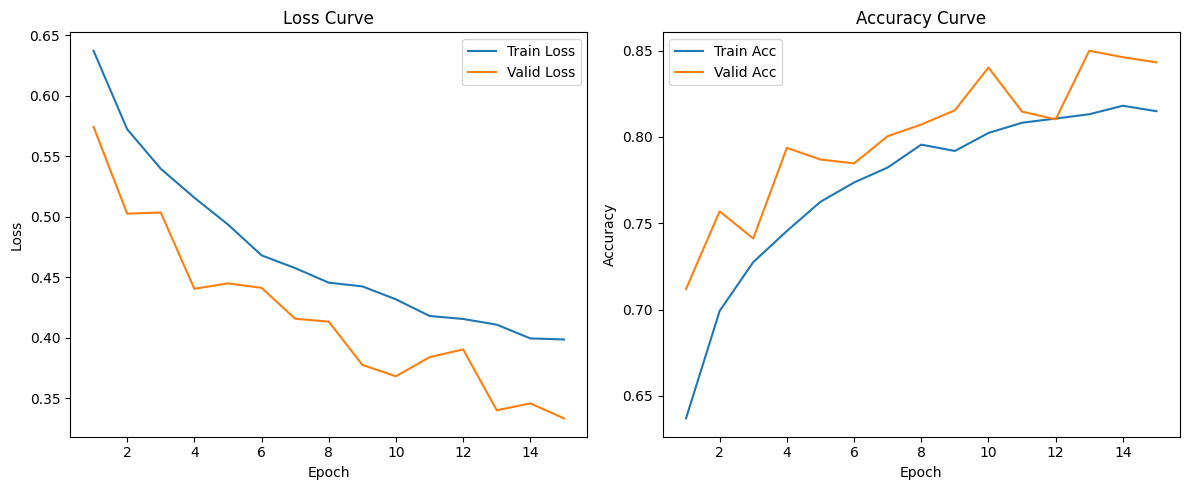

In [22]:
# 繪製訓練/驗證 loss 和 acc 曲線
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_accs, label='Train Acc')
plt.plot(epochs, valid_accs, label='Valid Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

VRAM 3GB 

# Load Best Model and Evaluate

Load the best saved model and evaluate on validation set.

In [23]:
model.load_state_dict(torch.load('./best_gender_model_v1.pth', weights_only=False))
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Validation Accuracy: {correct / total:.4f}')

Validation Accuracy: 0.8500


In [24]:

# Test single image prediction
from PIL import Image

test_img_name = train_df.iloc[0]['filename']
test_img_path = os.path.join(img_dir, test_img_name)
test_img = Image.open(test_img_path).convert('RGB')

# Apply same preprocessing as validation
test_tensor = valid_transform(test_img).unsqueeze(0).to(device)  # Add batch dimension

model.eval()
with torch.no_grad():
    output = model(test_tensor)
    pred = torch.argmax(output, dim=1).item()
    print(f"Predicted gender for {test_img_name}: {pred}")

Predicted gender for 03199A29.jpg: 0


# Reference

## 模型各層用途與參數說明

- `nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)`: 卷積層，輸入3通道(RGB)，輸出32通道，卷積核大小3x3，步幅1，邊界補零1。
- `nn.BatchNorm2d(32)`: 對32通道做批次正規化，加速收斂並穩定訓練。
- `nn.ReLU()`: 非線性激活函數，增加模型表現力。
- `nn.MaxPool2d(2, 2)`: 最大池化，將特徵圖尺寸縮小一半，提取主要特徵。
- `nn.Linear(256 * 14 * 14, 256)`: 全連接層，將展平後的特徵(256通道，每通道14x14)映射到256維。
- `nn.ReLU()`: 非線性激活。
- `nn.Dropout(dropout_rate)`: 隨機丟棄部分神經元，防止過擬合。
- `nn.Linear(256, 2)`: 全連接層，將256維特徵映射到2類(性別)。

## 為什麼 nn.Linear(256 * 14 * 14, 256)？

- 這裡的 `256 * 14 * 14` 是因為最後一層卷積輸出 shape 為 `(batch_size, 256, 14, 14)`。
- 256 是最後一層卷積的輸出通道數。
- 14 x 14 是經過多次池化後的空間尺寸（由輸入 224x224 經過 4 次 MaxPool2d(2,2) 變成 14x14）。
- 所以展平後的特徵維度就是 256 * 14 * 14。
- 這個數字必須和卷積結構、輸入尺寸一致，否則全連接層無法正確接收輸入。

---

## 模型學習參數個數計算方式

- 每層的參數數量 = 權重數量 + 偏置數量。
- 卷積層 `nn.Conv2d(in_channels, out_channels, kernel_size, ...)`：
  - 權重：`in_channels × out_channels × kernel_size × kernel_size`
  - 偏置：`out_channels`
- 批次正規化層 `nn.BatchNorm2d(out_channels)`：
  - 參數：`out_channels × 2`（gamma, beta）
- 全連接層 `nn.Linear(in_features, out_features)`：
  - 權重：`in_features × out_features`
  - 偏置：`out_features`
- Dropout、ReLU、MaxPool 沒有參數。

### 以 SimpleCNN 為例，總參數數量可用下列程式計算：

```python
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")
```

---

## 模型學習參數個數計算方式與範例

- 每層的參數數量 = 權重數量 + 偏置數量。
- 卷積層 `nn.Conv2d(in_channels, out_channels, kernel_size, ...)`：
  - 權重：`in_channels × out_channels × kernel_size × kernel_size`
  - 偏置：`out_channels`
- 批次正規化層 `nn.BatchNorm2d(out_channels)`：
  - 參數：`out_channels × 2`（gamma, beta）
- 全連接層 `nn.Linear(in_features, out_features)`：
  - 權重：`in_features × out_features`
  - 偏置：`out_features`
- Dropout、ReLU、MaxPool 沒有參數。

### 以 SimpleCNN 第一層卷積為例：
- `nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)`
  - 權重：3 × 32 × 3 × 3 = 864
  - 偏置：32
  - 合計：896

### 第一個全連接層：
- `nn.Linear(256 * 14 * 14, 256)`
  - 權重：50176 × 256 = 12,845,056
  - 偏置：256
  - 合計：12,845,312

### 批次正規化層：
- `nn.BatchNorm2d(32)`
  - 參數：32 × 2 = 64

### 計算全部參數（可用程式自動計算）：
```python
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")
```

---